In [1]:
import pyflubl
import IPAC_2025
import matplotlib.pyplot as _plt

m = IPAC_2025.test_IPAC_2025()

MakeFlukaCustomFluka


Read 1 detectors
Statistics present


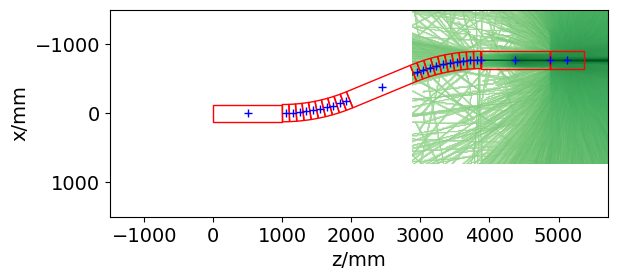

In [42]:
_plt.rcParams.update({'font.size': 14})

d = pyflubl.Analysis.openFile("./run_IPAC_2025/usrbin.bnn","usrbin")
bk = pyflubl.Analysis.openBookkeepingFile("IPAC_2025.json")
pyflubl.Analysis.plot_usrbin(d,detector_idx=0,projection=1,bookkeeping=bk)
pyflubl.Analysis.plot_machine_xz(m)
# _plt.colorbar()
_plt.savefig("IPAC_USRBIN.pdf", bbox_inches='tight')

_plt.tight_layout()

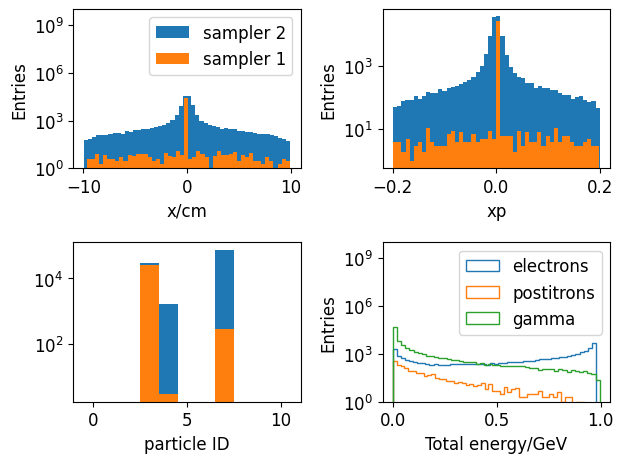

In [43]:
import numpy
import uproot
import awkward as ak


file_names = ["./run_IPAC_2025/IPAC_2025001_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025002_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025003_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025004_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025005_pyflubl.root"]

trees = [uproot.open(f)["event"] for f in file_names]

arrays = [tree["s1.x"].array() for tree in trees]
s1_x_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s2.x"].array() for tree in trees]
s2_x_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s1.xp"].array() for tree in trees]
s1_xp_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s2.xp"].array() for tree in trees]
s2_xp_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s1.energy"].array() for tree in trees]
s1_energy_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s2.energy"].array() for tree in trees]
s2_energy_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s1.partID"].array() for tree in trees]
s1_partID_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s2.partID"].array() for tree in trees]
s2_partID_all = numpy.ravel(ak.concatenate(arrays))

_plt.rcParams.update({'font.size': 12})

_plt.subplot(2,2,1)
_plt.hist(s2_x_all[abs(s2_x_all) < 10],50, label="sampler 2");
_plt.hist(s1_x_all[abs(s1_x_all) < 10],50, label="sampler 1");
_plt.xlabel("x/cm")
_plt.ylabel("Entries")
_plt.semilogy();
_plt.ylim(1,1e10)
_plt.legend()

_plt.subplot(2,2,2)
_plt.hist(s2_xp_all[abs(s2_xp_all) < 0.2],50, label="sampler 2");
_plt.hist(s1_xp_all[abs(s1_xp_all) < 0.2],50, label="sampler 1");
_plt.xlabel("xp")
_plt.ylabel("Entries")
_plt.semilogy();

_plt.subplot(2,2,3)
_plt.hist(s2_partID_all, 11, (-0.5,10.5), label="sampler 2");
_plt.hist(s1_partID_all, 11, (-0.5,10.5), label="sampler 1");
_plt.xlabel("particle ID")
_plt.semilogy()

_plt.subplot(2,2,4)
_plt.hist(s2_energy_all[s2_partID_all == 3], 50, label="electrons", histtype="step");
_plt.hist(s2_energy_all[s2_partID_all == 4], 50, label="postitrons", histtype="step");
_plt.hist(s2_energy_all[s2_partID_all == 7], 50, label="gamma", histtype="step");
_plt.xlabel("Total energy/GeV")
_plt.ylabel("Entries")
_plt.semilogy();
_plt.ylim(1,1e10)
_plt.legend()

_plt.tight_layout()

_plt.savefig("IPAC_SAMPLER.pdf")

In [44]:
import numpy
import uproot
import awkward as ak


file_names = ["./run_IPAC_2025/IPAC_2025001_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025002_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025003_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025004_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025005_pyflubl.root"]

trees = [uproot.open(f)["event"] for f in file_names]

arrays = [tree["eloss.E"].array() for tree in trees]
eloss_E = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["eloss.S"].array() for tree in trees]
eloss_S = numpy.ravel(ak.concatenate(arrays))

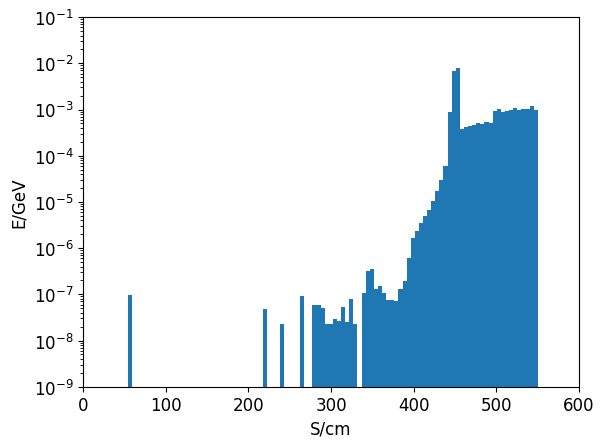

In [50]:
nevt = 5000*5
_plt.rcParams.update({'font.size': 12})

_plt.hist(eloss_S,100, weights=eloss_E/nevt);
_plt.semilogy()
_plt.xlabel("S/cm")
_plt.ylabel("E/GeV")
_plt.ylim(1e-9,0.1)
_plt.xlim(0,600)

#bk['elements']
#for k in bk['elements'] :
#    S = (bk['elements'][k]['S']-bk['elements'][k]['length']/2)*100
#    _plt.axvline(S,color='r')
#    print(k,S)

_plt.savefig("IPAC_ELOSS.pdf")
